Broad Question: 

Question 3: 
We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

Specific Question:
For university students ages 18-22, which month between April and September has the highest player traffic, which week it is, and is it during working hours (8:00 am - 4:00 pm) studying hours (5:00 pm - 12:00 pm), or sleep hours (1:00 am - 7:00 am)?

In [1]:
library(tidyverse)
library(repr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [21]:
players_url <- "https://raw.githubusercontent.com/klam42/project/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/klam42/project/refs/heads/main/sessions.csv"

players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

players

player_summary <- players |>
    select(played_hours, Age) |>
    map_df(mean, na.rm = TRUE)
    mutate(age = round())

player_summary




Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


ERROR: Error in mutate(age = round()): 0 arguments passed to 'round' which requires 1 or 2 arguments


month,count
<fct>,<int>
September,39
August,74
May,58
July,76
June,87
April,36


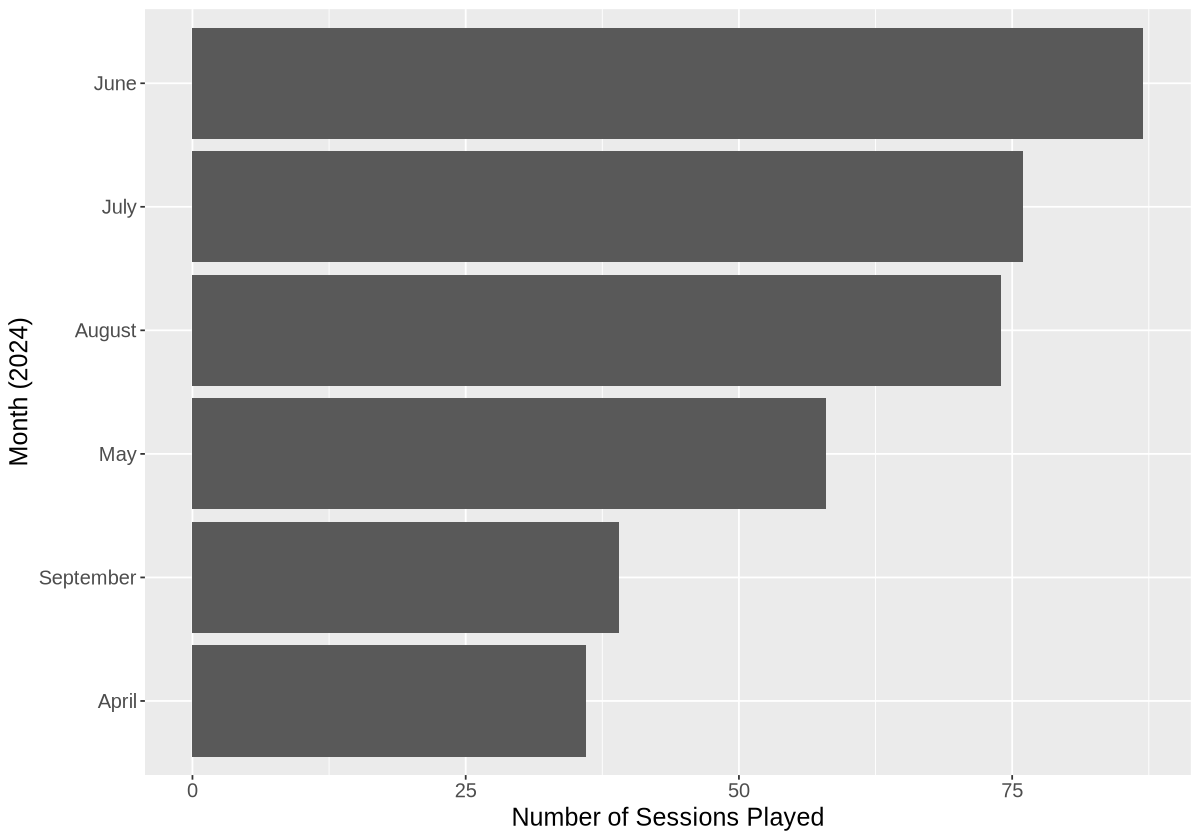

In [3]:
options(repr.plot.width = 10, repr.plot.height = 7)

uni_student <- players |>
    select(hashedEmail, Age) |>
    filter(Age <= 22 & Age>= 18)

uni_student_vector <- pull(uni_student, hashedEmail)

uni_student_sessions <- sessions |> 
    select(hashedEmail:start_time) |>
    filter(hashedEmail %in% uni_student_vector) |>
    separate(col = start_time, into = c("day", "month", "year"), sep = "/")|>
    separate(col = year, into = c("year", "time"), sep = " ") |>
    separate(col = time, into = c("hour", "minute"), sep = ":")


sessions_per_month = uni_student_sessions |>
    select(hashedEmail, day, month)|>
    mutate(month = as_factor(month)) |>
    group_by(month) |>
    summarize(count = n())|>
    mutate(month =  fct_recode(month, 
                    "April" = "04",
                    "May" = "05",
                    "June" = "06",
                    "July" = "07",
                    "August" = "08",
                    "September" = "09"))
    

monthly_sessions <- sessions_per_month |>
    ggplot(aes(x = count, y = fct_reorder(month, count))) +
    geom_bar(stat = "identity") +
    labs(x = "Number of Sessions Played", y = "Month (2024)") +
    theme(text = element_text(size = 15))


sessions_per_month
monthly_sessions

hashedEmail,day,month,hour
<chr>,<dbl>,<chr>,<dbl>
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,30,06,16
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21,06,15
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,5,06,3
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,27,06,21
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,19,06,4
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,24,06,3
24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,16,06,17
b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319,30,06,20
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,15,06,5


day,hour,count,time_of_day,week
<dbl>,<dbl>,<int>,<chr>,<chr>
3,0,1,study_hours,Week 1
3,23,1,study_hours,Week 1
4,7,1,sleep_hours,Week 1
5,1,2,sleep_hours,Week 1
5,2,2,sleep_hours,Week 1
5,3,1,sleep_hours,Week 1
5,19,1,study_hours,Week 1
6,6,1,sleep_hours,Week 1
7,1,1,sleep_hours,Week 1


day,count
<dbl>,<int>
3,2
4,1
5,6
6,1
7,1
8,3
10,1
11,2
12,4


week,total_count
<fct>,<int>
Week 1,14
Week 2,19
Week 3,27
Week 4,27


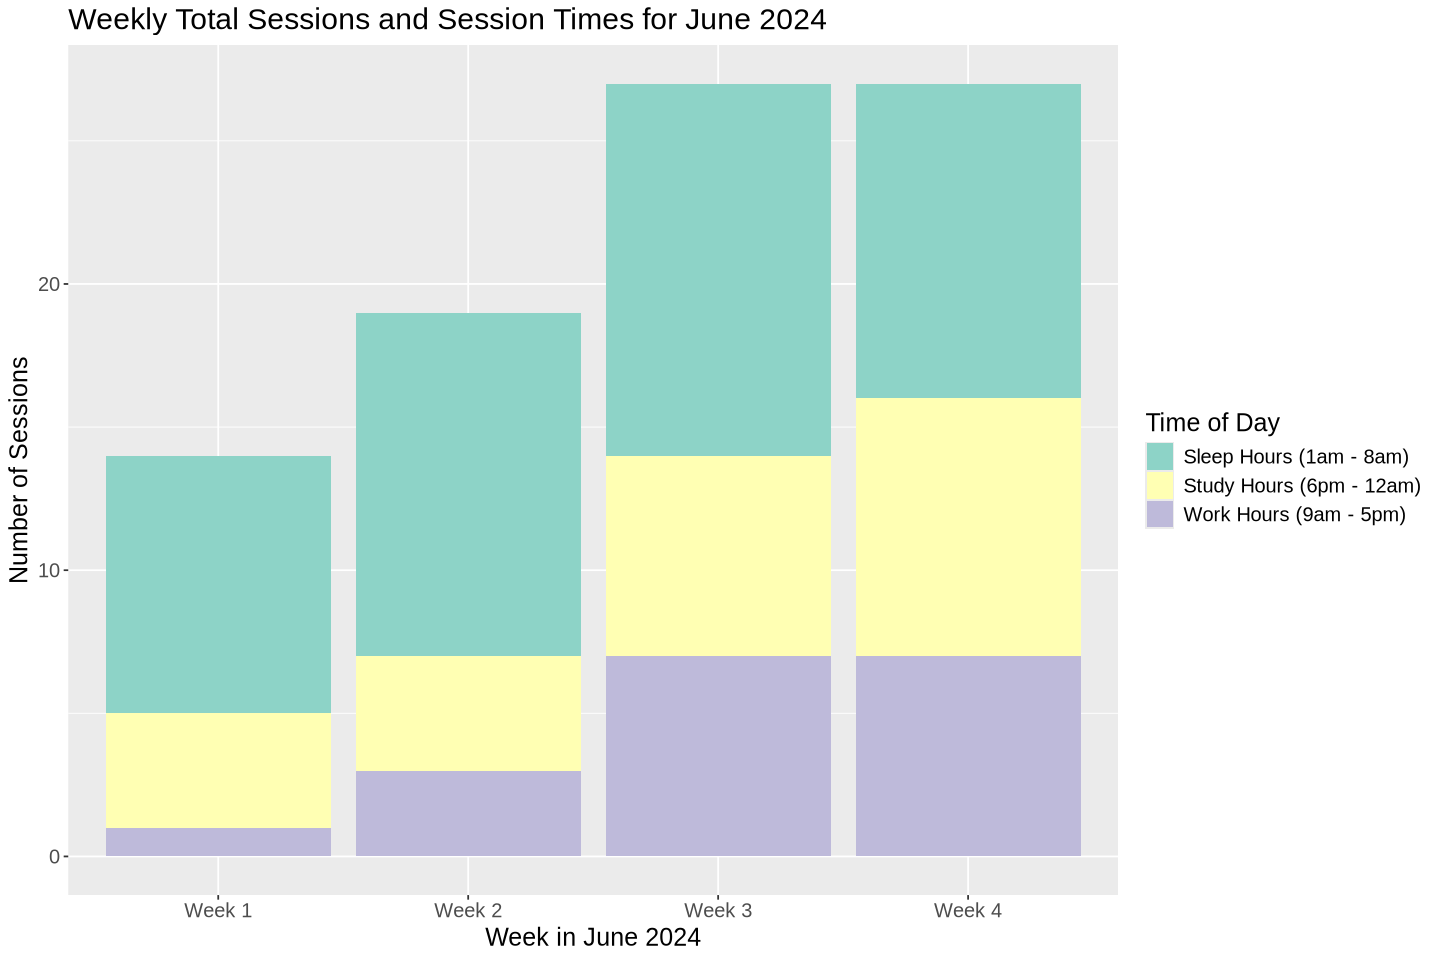

In [10]:
options(repr.plot.width = 12, repr.plot.height = 8)

june_sessions <- uni_student_sessions |>
    select(hashedEmail, day, month, hour) |>
    filter(month == "06") |>
    mutate(day = as.numeric(day))|>
    mutate(hour = as.numeric(hour))

june_sessions


work_hours <- c(09, 10, 11, 12, 13, 14, 15, 16, 17)
study_hours <- c(18, 19, 20, 21, 22, 23, 0)
sleep_hours <- c(01, 02, 03, 04, 05, 06, 07, 08)
week_1 <- c(1:8)
week_2 <- c(9:15)
week_3 <- c(16:22)
week_4 <- c(23:30)


sessions_per_hour <- june_sessions |>
        group_by(day, hour) |>
        summarize(count = n(), .groups = "drop") |>
        mutate(time_of_day = case_when(
            hour %in% work_hours ~ "work_hours",
            hour %in% study_hours ~ "study_hours",
            hour %in% sleep_hours ~ "sleep_hours" )) |>
        mutate(week = case_when(
            day %in% week_1 ~ "Week 1",
            day %in% week_2 ~ "Week 2",
            day %in% week_3 ~ "Week 3",
            day %in% week_4 ~ "Week 4"))

sessions_per_hour

total_daily_sessions <- june_sessions |>
        group_by(day) |>
        summarize(count = n())

total_daily_sessions   

total_weekly_sessions <- sessions_per_hour |>
        mutate(week = as_factor(week))|>
        group_by(week) |>
        summarize(total_count = sum(count))

total_weekly_sessions 


weekly_sessions_plot <- sessions_per_hour |>
    ggplot(aes(x = week, y = count, fill = time_of_day)) +
    geom_bar(stat = "identity") +
    scale_fill_brewer(name = "Time of Day", palette = "Set3", 
                      labels = c("sleep_hours" = "Sleep Hours (1am - 8am)", 
                                 "work_hours" = "Work Hours (9am - 5pm)",
                                 "study_hours" = "Study Hours (6pm - 12am)")) +
    labs(x = "Week in June 2024", y = "Number of Sessions", fill = "Time of Day") +
    ggtitle("Weekly Total Sessions and Session Times for June 2024") +
    theme(text = element_text(size = 15))
           
weekly_sessions_plot
